In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font='mingliu')
df = pd.read_csv('train.csv')

In [182]:
def data_clean(df, name):
    # 輸入欄位中英對照表，並轉換欄位名稱為中文
    tr = pd.read_csv('tran_of_feature.csv')
    cht = tr['cht'].tolist()
    df.columns = cht

    #所有有關年份的資料，改成距今年數。例如：建造年份 1980 → 屋齡 40
    df['屋齡'] = 2020 - df['建造年分'] 
    df['翻修屋齡'] = 2020 - df['改建年分']
    df['車庫庫齡'] = 2020 - df['車庫建造年份']

    #移除缺失值太多的欄位：遺失值大於總樣本80%
    df.dropna(thresh=len(df) * 0.8, axis=1, inplace=True)

    #車庫相關的遺失值，面積都是0，表示根本沒有車庫。除庫齡 = 0，其他以No Garage填滿
    df['車庫庫齡'].fillna(0, inplace=True)
    df['車庫裝潢'].fillna('No Garage', inplace=True)
    df['車庫類型'].fillna('No Garage', inplace=True)
    df['車庫品質'].fillna('No Garage', inplace=True)
    df['車庫現況'].fillna('No Garage', inplace=True)

    #街道長度依鄰居分類取平均填入
    b_style = []
    for i in range(len(b_style)):
        if df['鄰居'].tolist()[i] not in b_style:
            titles.append(df['鄰居'].tolist()[i])
    b_style_sl_mean = df.groupby('鄰居')['街道長度'].mean()
    b_style_sl_mean.tolist()
    b_style_uniq = df['鄰居'].unique().tolist()
    b_style_uniq.sort()
    b_style_sl_mapping = {}
    for i in range(len(b_style_sl_mean)):
        b_style_sl_mapping[b_style_uniq[i]]= b_style_sl_mean[i]
    df['街道長度'] = df['街道長度'] .fillna(df['鄰居'].map(b_style_sl_mapping))



    #有序變數編碼
    df['街道類型'] = df['街道類型'].map({'Grvl':0, "Pave":1})
    df['路面狀況'] = df['路面狀況'].map({'Reg':3, "IR1":2, 'IR2':1, "IR3":0})
    df['路面平整程度'] = df['路面平整程度'].map({'Lvl':3, "Bnk":2, 'HLS':1, "Low":0})
    df['實用性'] = df['實用性'].map({'AllPub':3, "NoSewr":2, 'NoSeWa':1, "ELO":0})
    df['街道配置'] = df['街道配置'].map({'FR3':3, 'FR2':3, "CulDSac":2, 'Corner':1, "Inside":0})
    df['土地坡度'] = df['土地坡度'].map({'Gtl':2, "Mod":1, 'Sev':0})
    df['鄰近鐵路'] = df['環境'].map({'Artery':'Artery', 'Feedr':'Feedr', 'Norm':'Norm', 'RRNn':1, 'RRAn':2, 'PosN':'PosN', 'PosA':'PosA', 'RRNe':1, 'RRAe':2})
    df['鄰近鐵路'][df['鄰近鐵路'] != 1] = df['環境2'].map({'Artery':0, 'Feedr':0, 'Norm':0, 'RRNn':1, 'RRAn':2, 'PosN':0, 'PosA':0, 'RRNe':1, 'RRAe':2})
    df['鄰近幹道'] = df['環境'].map({'Artery':1, 'Feedr':'Feedr', 'Norm':'Norm', 'RRNn':'RRNn', 'RRAn':'RRAn', 'PosN':'PosN', 'PosA':'PosA', 'RRNe':'RRNe','RRAe':'RRAe'})
    df['鄰近幹道'][df['鄰近幹道'] != 1] = df['環境2'].map({'Artery':1, 'Feedr':0, 'Norm':0, 'RRNn':0, 'RRAn':0, 'PosN':0, 'PosA':0, 'RRNe':0, 'RRAe':0})
    df['周遭環境'] = df['環境'].map({'Artery':'Artery', 'Feedr':'Feedr', 'Norm':0, 'RRNn':'RRNn', 'RRAn':'RRAn', 'PosN':1, 'PosA':2, 'RRNe':'RRNe', 'RRAe':'RRAe'})
    df['周遭環境'][df['周遭環境'] != 1] = df['環境2'].map({'Artery':0, 'Feedr':0, 'Norm':0, 'RRNn':0, 'RRAn':0, 'PosN':1, 'PosA':2, 'RRNe':0, 'RRAe':0})
    df['外部質感'] = df['外部質感'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
    df['外部現況'] = df['外部現況'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
    df['中央空調'] = df['中央空調'].map({'N':0, "Y":1})
    df['電路狀況'] = df['電路狀況'].map({'SBrkr':4,'FuseA':3,'FuseF':2,'FuseP':1,'Mix':0})
    df['廚房品質'] = df['廚房品質'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
    df['住家機能評分'] = df['住家機能評分'].map({'Typ':0,'Min1':0,'Min2':0,'Mod':0,'Maj1':0,'Maj2':0,'Sev':0,'Sal':0})
    df['車庫裝潢'] = df['車庫裝潢'].map({'Fin':0,'RFn':0,'Unf':0,'No Garage':0})
    df['車庫品質'] = df['車庫品質'].map({'Ex':0,'Gd':0,'TA':0,'Fa':0,'Po':0,'No Garage':0})
    df['車庫現況'] = df['車庫現況'].map({'Ex':0,'Gd':0,'TA':0,'Fa':0,'Po':0,'No Garage':0})
    df['車庫車道'] = df['車庫車道'].map({'N':0,'P':1, "Y":2})

    #移除重新編碼過的欄位
    df.drop(['建造年分', '改建年分', '車庫建造年份', '環境', '環境'], axis=1, inplace=True)
    #移除全部樣本都一樣值的欄位
    df.drop(['車庫品質', '車庫現況', '車庫裝潢', '住家機能評分'], axis=1, inplace=True)

    df.to_csv(name + '_cleaned.csv', encoding='utf_8_sig', index=False)
    return df

In [183]:
df = data_clean(df, "Train")
#部分欄位之遺失值未滿總樣本5%，直接刪除，未免影響最終測試集的資料清理，不放入data_clean方法
df.dropna(inplace=True)

X = df[['生活空間面積', '外部質感', '廚房品質', '屋齡']]
y = df['銷售價格']


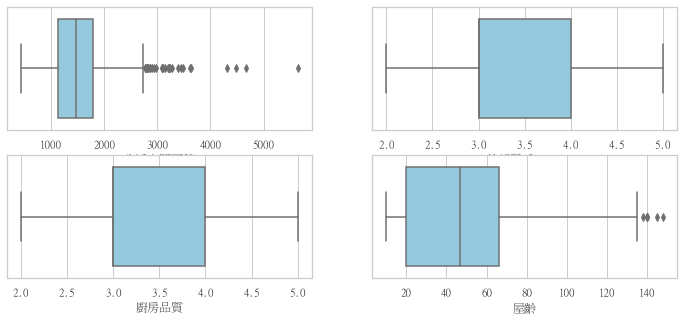

In [184]:
fig, axs = plt.subplots( 2,2,figsize=(12,5) )

plt.subplot( 2,2,1 )
sns.boxplot( df['生活空間面積'], orient='h', color='skyblue' )
plt.xlabel( '生活空間面積' ) 

plt.subplot( 2,2,2 )
sns.boxplot( df['外部質感'], orient='h', color='skyblue' )
plt.xlabel( '外部質感 Fare' ) 

plt.subplot( 2,2,3 )
sns.boxplot( df['廚房品質'], orient='h', color='skyblue' )
plt.xlabel( '廚房品質' ) 

plt.subplot( 2,2,4 )
sns.boxplot( df['屋齡'], orient='h', color='skyblue' )
plt.xlabel( '屋齡' ) 
plt.show()

In [185]:
Q1 = df[['生活空間面積', '屋齡']].quantile(0.25)
Q3 = df[['生活空間面積', '屋齡']].quantile(0.75)
IQR = Q3 - Q1

In [186]:
#print(boston_df_o1 < (Q1 - 1.5 * IQR)) |(boston_df_o1 > (Q3 + 1.5 * IQR))
df = df[df['生活空間面積'] > (Q1[0] - 1.5 * IQR[0])]
df = df[df['生活空間面積'] < (Q1[0] + 1.5 * IQR[0])]
df = df[df['屋齡'] > (Q1[1] - 1.5 * IQR[1])]
df = df[df['屋齡'] < (Q1[1] + 1.5 * IQR[1])]

X = df[['生活空間面積', '外部質感', '廚房品質'], '屋齡']
y = df['銷售價格']


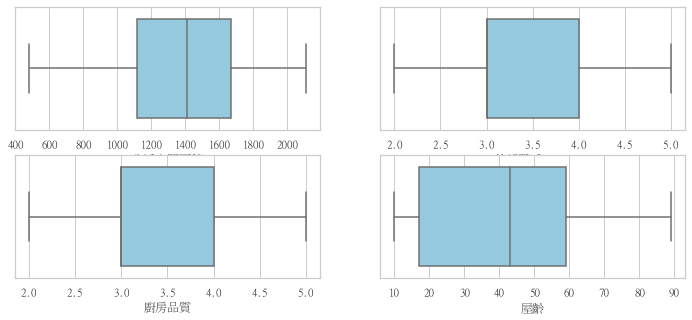

In [187]:
fig, axs = plt.subplots( 2,2,figsize=(12,5) )

plt.subplot( 2,2,1 )
sns.boxplot( df['生活空間面積'], orient='h', color='skyblue' )
plt.xlabel( '生活空間面積' ) 

plt.subplot( 2,2,2 )
sns.boxplot( df['外部質感'], orient='h', color='skyblue' )
plt.xlabel( '外部質感 Fare' ) 

plt.subplot( 2,2,3 )
sns.boxplot( df['廚房品質'], orient='h', color='skyblue' )
plt.xlabel( '廚房品質' ) 

plt.subplot( 2,2,4 )
sns.boxplot( df['屋齡'], orient='h', color='skyblue' )
plt.xlabel( '屋齡' ) 
plt.show()

In [188]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler().fit(X)
X = scale.fit_transform(X)

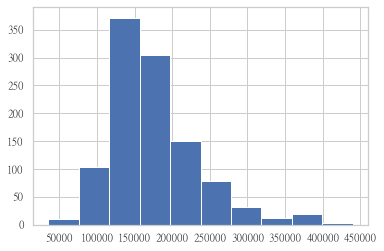

In [189]:
y.hist(bins = 10)
plt.show()

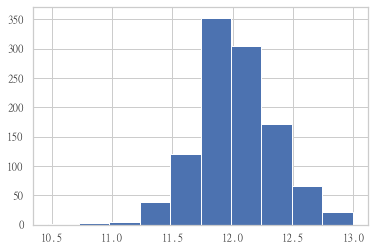

In [190]:
y = np.log(y)
y.hist(bins = 10)
plt.show()


In [191]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ridge_regression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# qua = PolynomialFeatures(degree=2)
# X =qua.fit_transform(X)



# forest = RandomForestRegressor(n_estimators=2000, criterion='mse', random_state=100, n_jobs=-1)
# lasso = Lasso()
# ridge = Ridge()
# elanet = ElasticNet()
# svr = SVR()
# parameters = {'kernel':['rbf', 'sigmoid'], 'C':np.logspace(np.log10# (0.001), np.log10(200), num=20), 'gamma':np.logspace(np.log10(# 0.00001), np.log10(2), num=30)}
# gs = GridSearchCV(svr, parameters,#  n_jobs=8, verbose=2)
# parameters_lasso =#  {"fit_intercept" : [Tru# e, False], "normalize" : [Trsso = lasso_grid.best_estimator_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
lr = LinearRegression()

lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.031, test: 0.034
R^2 train: 0.663, test: 0.716


In [192]:
pred_mod = lr.fit(X, y)

In [193]:
final = pd.read_csv('test.csv')
final['SalePrice'] = 0
final_test = data_clean(final, 'Test')
final_test = final_test[['生活空間面積', '外部質感', '廚房品質', '屋齡']]
fill_mode = final_test['廚房品質'].mode()
final_test['廚房品質'] = final_test['廚房品質'].fillna(3)
final_test.isnull().sum()
scale = StandardScaler().fit(final_test)
final_test = scale.fit_transform(final_test)
# final_test = qua.fit_transform(final_test)

In [194]:
final_value = pred_mod.predict(final_test)
final_value = np.exp(final_value)

submission = pd.DataFrame()
submission['Id'] = final['Id']
submission['SalePrice'] = final_value
submission.to_csv('submission.csv', index=False)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 4)